In [1]:
import pandas as pd


df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X = df.drop("target", axis=1)
y = df["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

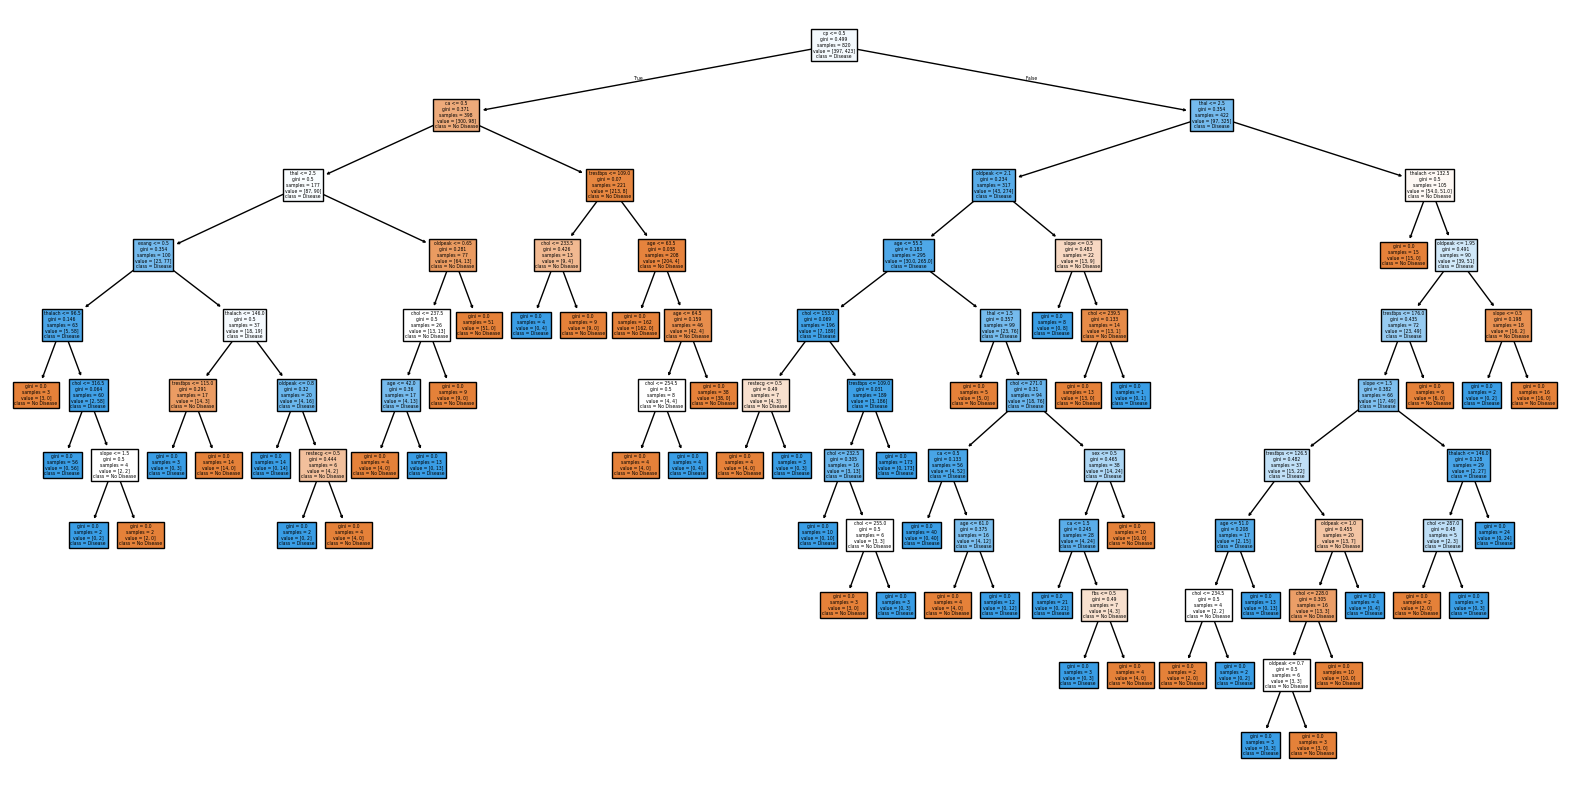

In [4]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

In [5]:
from sklearn.metrics import accuracy_score


for depth in [2, 4, 6, 8, None]:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_acc = dt.score(X_train, y_train)
    test_acc = dt.score(X_test, y_test)
    print(f"Depth: {depth}, Train Acc: {train_acc:.3f}, Test Acc: {test_acc:.3f}")


Depth: 2, Train Acc: 0.770, Test Acc: 0.678
Depth: 4, Train Acc: 0.883, Test Acc: 0.800
Depth: 6, Train Acc: 0.949, Test Acc: 0.883
Depth: 8, Train Acc: 0.990, Test Acc: 0.976
Depth: None, Train Acc: 1.000, Test Acc: 0.985


In [6]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


rf_train_acc = rf.score(X_train, y_train)
rf_test_acc = rf.score(X_test, y_test)

print(f"Random Forest - Train Acc: {rf_train_acc:.3f}, Test Acc: {rf_test_acc:.3f}")


Random Forest - Train Acc: 1.000, Test Acc: 0.985


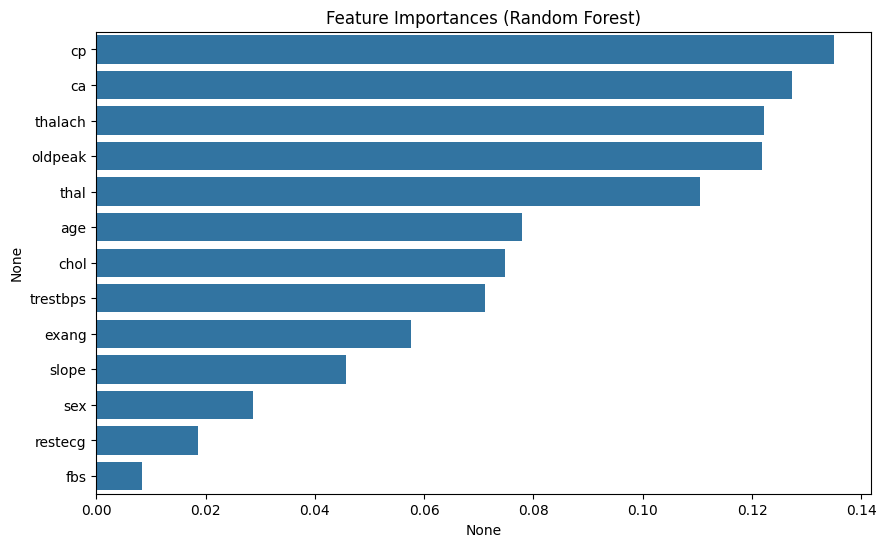

In [7]:
import seaborn as sns


importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances (Random Forest)")
plt.show()


In [8]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(rf, X, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.3f}")


Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.997
